In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col= 0)

In [3]:
identifier_columns = ['Country','ASBH02A','avgscore']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [4]:
df['avgscore'] = df[positive_feelings_in_school].mean(axis=1)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [5]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38671
0.0     1110
3.0      852
6.0      483
8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [6]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna(-1.0)

In [7]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

-1.0    38671
 0.0     1110
 3.0      852
 6.0      483
 8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [8]:
pivot_minage = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [9]:
pivot_minage

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,1.458053,1.443902,1.528927,1.476923,1.559887
Egypt,1.404495,1.479006,1.418519,1.741905,1.615278
France,1.593398,1.602564,1.665459,1.462585,1.533333
Germany,1.384632,1.446809,1.465128,1.555238,1.511538
Iran,NaN,NaN,NaN,NaN,NaN
Jordan,1.271527,1.264219,1.284843,1.261716,1.382051
Netherlands,1.334791,1.358974,1.406250,1.362963,1.200000
Sweden,1.474186,1.499383,1.482201,1.402252,1.526126
Turkey,NaN,NaN,NaN,NaN,NaN


In [10]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_minage.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

### Create a custom sorter for ASBH02A
## asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_minage.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
##index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_minage.loc[index_df.index]

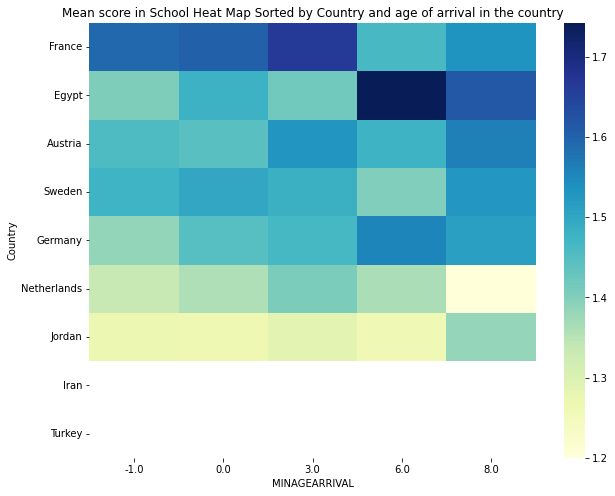

In [11]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=False, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

Next steps - comparisons with bench marks - through line? 
Should compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

Also practice making same graphics with otherprograms